In [1]:
import random as rd
import numpy as np
import scipy as sp

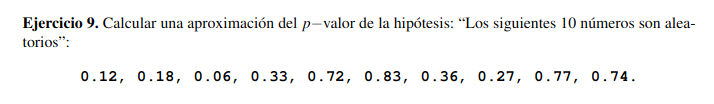

Mi hipotesis establece que los datos provienen de una distribución continua F ~ U(0,1). Luego 
$$
F(x) = \begin{cases}
0 & \text{si } x < 0 \\
x & \text{si } 0 \lt x \lt 1 \\
1 & \text{si } x \geq 1
\end{cases}
$$

Mi muestra $Y_1, Y_2, \dots, Y_10$ es la siguiente:

[0.06, 0.12, 0.18, 0.27, 0.33, 0.36, 0.72, 0.74, 0.77, 0.83]

| j | Y_j | F(Y_j) | $\frac{j}{10} - F(Y_j)$ | F(Y_j) - $\frac{j-1}{10}$ |
|---|-----|--------|------------------------|--------------------------|
| 1 | 0.06 | 0.06 | 0.04 | -0.04 |
| 2 | 0.12 | 0.12 | 0.08 | -0.08 |
| 3 | 0.18 | 0.18 | 0.12 | -0.12 |
| 4 | 0.27 | 0.27 | 0.13 | -0.13 |


In [2]:
"""  
Toma los datos observados y la funcion de distribucion acomulada
de la distribucion que se quiere probar.
"""
def estadistico_K_S(datos, F):
    datos.sort()
    n = len(datos)
    D = []
    for i in range(n):
        izq = ((i+1)/n) - F(datos[i])
        der = F(datos[i]) - i/n
        D.append(max(izq, der))
    return max(D)

In [3]:
def estimar_pvalor(nsims, data, F):
    n = len(data)
    d_obs = estadistico_K_S(data, F)
    p_v = 0
    
    for _ in range(nsims):
        u_m = np.random.uniform(0, 1, n) # genero la nueva muestra
        u_m.sort()
        d_j = 0
        for j in range(n):
            u_j = u_m[j]
            d_j = max(d_j, (j+1)/n - u_j , u_j - j/n)
        if d_j >= d_obs:
            p_v += 1

    return p_v/nsims

In [4]:
datos = [0.06, 0.12, 0.18, 0.27, 0.33, 0.36, 0.72, 0.74, 0.77, 0.83]
F = lambda x: x
datos.sort()
d_obs = estadistico_K_S(datos, F)
print(d_obs)
p_valor = estimar_pvalor(1000, datos, F)
print(p_valor)

0.24
0.555


In [5]:
sp.stats.kstest(datos, 'uniform', args=(0, 1)) # para comparar con el test de scipy

KstestResult(statistic=0.24, pvalue=0.5354975540922944, statistic_location=0.36, statistic_sign=1)